# Fast Flow

In [ ]:
import pandas as pd
#trial,payload,size,task_size,workers,time

#load sequential times
seq_times = pd.read_csv('results/sequential.csv')
seq_times = seq_times.drop(columns=['trial'])

#load parallel base times
par_times = pd.read_csv('results/naive_ff.csv')
par_times = par_times[par_times['time'] > 0]
par_times = par_times.drop(columns=['trial'])

#load parallel working emitter times (queue size 1)
we_times = pd.read_csv('results/working_emitter_ff.csv')
we_times = we_times[we_times['time'] > 0]
we_times = we_times.drop(columns=['trial'])

In [2]:
par_times.head()

,payload,size,task_size,workers,time
0,1,10000,-1,1,0.001171
1,1,10000,-1,3,0.001497
2,1,10000,-1,7,0.001608
3,1,10000,-1,15,0.002245
4,1,10000,-1,31,0.004342


In [3]:
we_times.head()

,payload,size,task_size,workers,time
0,1,10000,-1,1,0.000828
1,1,10000,-1,3,0.001467
2,1,10000,-1,7,0.001248
3,1,10000,-1,15,0.002543
4,1,10000,-1,31,0.004945


we first keep the best time for each size, and then we use this to compare based on the payload

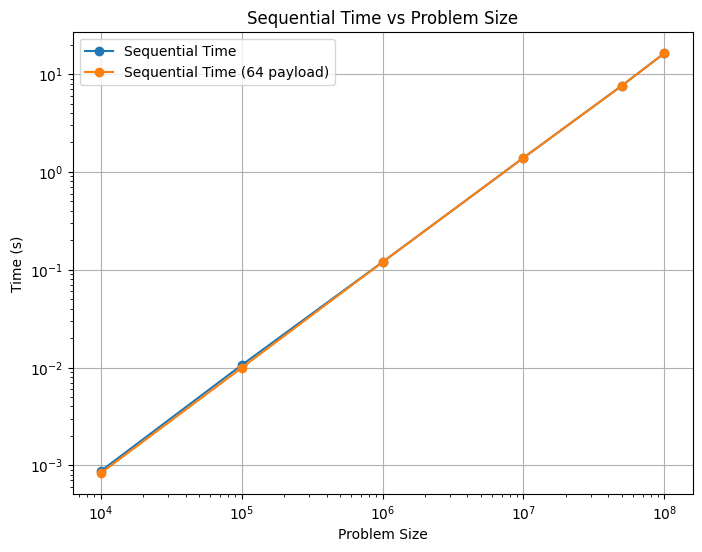

In [4]:
import matplotlib.pyplot as plt

small = seq_times[seq_times['payload'] == 1]
big = seq_times[seq_times['payload'] == 64]


# Plot sequential time vs problem size
plt.figure(figsize=(8, 6))
plt.plot(small['size'], small['time'], marker='o', label='Sequential Time')
plt.plot(big['size'], big['time'], marker='o', label='Sequential Time (64 payload)')
plt.xlabel('Problem Size')
plt.ylabel('Time (s)')
plt.title('Sequential Time vs Problem Size')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

seem that the payload size does not impact much on a single machine, so from now on all test are done using a payload of 1 to speedup the process and consume less resources. Although the sotring time is not influenced the total time required to generate the array is significantly higher.

In [5]:
par_times = par_times.groupby(['size', 'workers']).agg({'time': 'min'}).reset_index()
#par_times = par_times.loc[par_times.groupby('size')['time'].idxmin()].reset_index(drop=True)

we_times = we_times.groupby(['size', 'workers']).agg({'time': 'min'}).reset_index()
#we_times = we_times.loc[we_times.groupby('size')['time'].idxmin()].reset_index(drop=True)

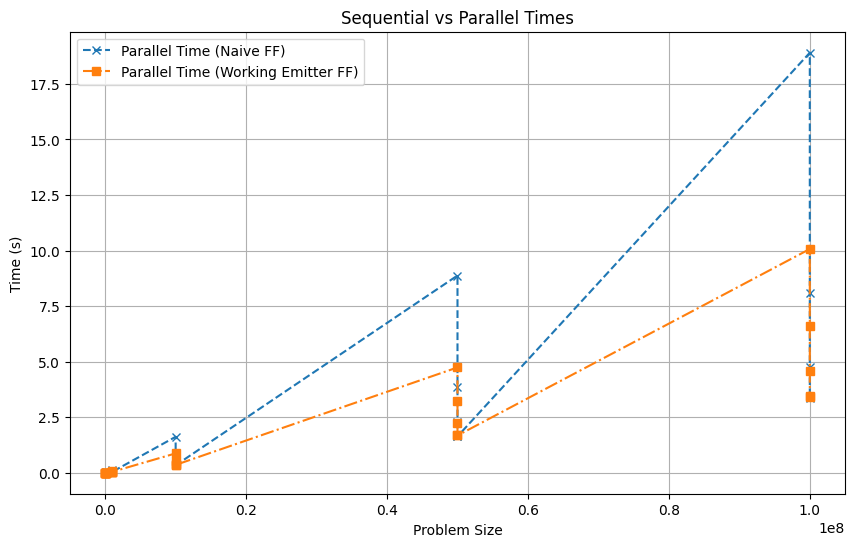

In [6]:
plt.figure(figsize=(10, 6))

# Plot sequential times
#plt.plot(small['size'], small['time'], marker='o', label='Sequential Time (Payload 1)')
#plt.plot(big['size'], big['time'], marker='o', label='Sequential Time (Payload 64)')

# Filter parallel times to show only the best time for each size
plt.plot(par_times['size'], par_times['time'], marker='x', label='Parallel Time (Naive FF)', linestyle='--')

# Filter working emitter times to show only the best time for each size
plt.plot(we_times['size'], we_times['time'], marker='s', label='Parallel Time (Working Emitter FF)', linestyle='-.')
# Configure plot
plt.xlabel('Problem Size')
plt.ylabel('Time (s)')
plt.title('Sequential vs Parallel Times')
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

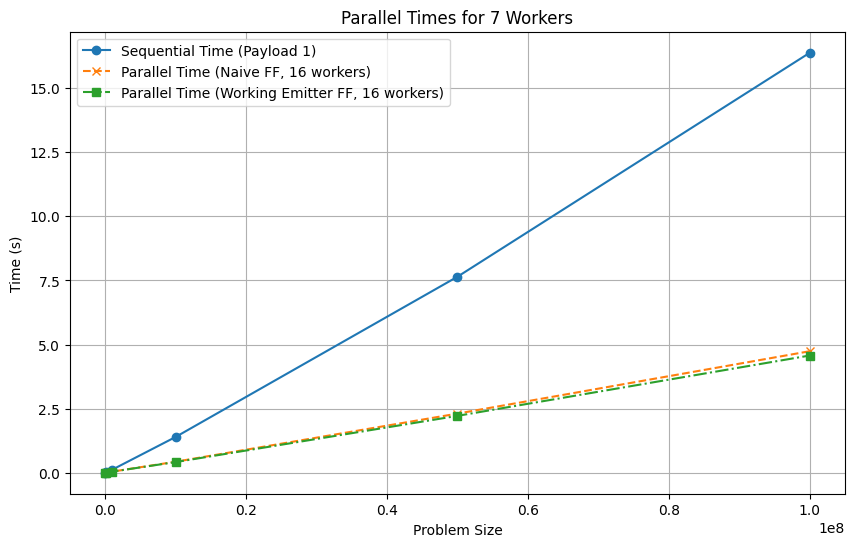

In [26]:
plt.figure(figsize=(10, 6))

numThreads = 8

par_x = par_times[par_times['workers'] == numThreads -1]
par_x = par_x.reset_index(drop=True)
we_x = we_times[we_times['workers'] == numThreads -1]
we_x = we_x.reset_index(drop=True)

# Plot sequential times
plt.plot(small['size'], small['time'], marker='o', label='Sequential Time (Payload 1)')

# Filter parallel times for workers = 16
plt.plot(par_x['size'], par_x['time'], marker='x', label='Parallel Time (Naive FF, 16 workers)', linestyle='--')

# Filter working emitter times for workers = 16
plt.plot(we_x['size'], we_x['time'], marker='s', label='Parallel Time (Working Emitter FF, 16 workers)', linestyle='-.')
# Configure plot
plt.xlabel('Problem Size')
plt.ylabel('Time (s)')
plt.title(f'Parallel Times for {numThreads-1} Workers')
plt.legend()
plt.grid(True)
plt.show()


what about the speedup?

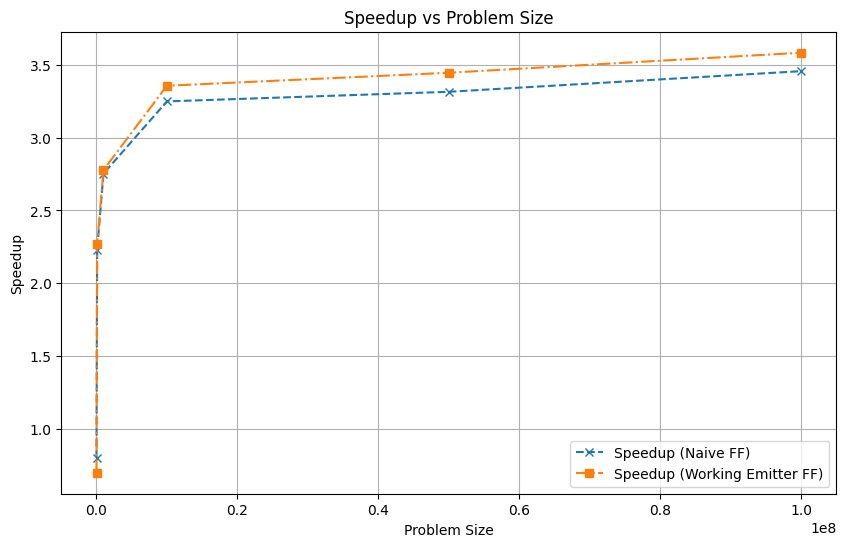

In [27]:
plt.figure(figsize=(10, 6))

# Calculate speedup for naive FF
speedup_naive = small['time'] / par_x['time']

# Calculate speedup for working emitter FF
speedup_emitter = small['time'] / we_x['time']

# Plot speedup
plt.plot(par_x['size'], speedup_naive, marker='x', label='Speedup (Naive FF)', linestyle='--')
plt.plot(we_x['size'], speedup_emitter, marker='s', label='Speedup (Working Emitter FF)', linestyle='-.')

# Configure plot
plt.xlabel('Problem Size')
plt.ylabel('Speedup')
plt.title('Speedup vs Problem Size')
plt.legend()
plt.grid(True)
plt.show()